In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("laptopData.csv")

In [3]:
df_Stats_Numeric = df.describe ( )
df_Stats_Numeric

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [4]:
df_Stats_Non_Numeric = df.describe ( exclude = np.number )
df_Stats_Non_Numeric

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
unique,19,6,25,40,118,10,40,110,9,189
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,290,710,640,495,183,601,401,271,1047,111


In [5]:
df.shape

(1303, 12)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()  

np.int64(29)

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

Unnamed: 0          1
Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [10]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop rows with missing values
df = df.dropna()

In [12]:
# Check whether missing values are dropped
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
# Drop the unnamed column ,axis=1
df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df = df[~df['Inches'].str.contains(r'\?', regex=True)]

In [15]:
df["Inches"]=df["Inches"].astype(float)

In [16]:
df["Ram"]=df["Ram"].str[:-2]

In [17]:
df["Ram"]=df["Ram"].astype(int)

In [18]:
df['Gpu Brand'] = df['Gpu'].str.split(" ").apply(lambda x: x[0])

In [19]:
df=df.drop("Gpu",axis=1)

In [20]:
df["ScreenResolution"]=df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
#store the splitted values in width and height
df["ScreenWidth"]=df.ScreenResolution.str.split("x").apply(lambda x:x[0])
df["ScreenHeight"]=df.ScreenResolution.str.split("x").apply(lambda x:x[1])
#drop the screenresoultion since values divided among width and height
df=df.drop("ScreenResolution",axis=1)

In [21]:
df["ScreenHeight"]=df["ScreenHeight"].astype(int)
df["ScreenWidth"]=df["ScreenWidth"].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1272 non-null   object 
 1   TypeName      1272 non-null   object 
 2   Inches        1272 non-null   float64
 3   Cpu           1272 non-null   object 
 4   Ram           1272 non-null   int64  
 5   Memory        1272 non-null   object 
 6   OpSys         1272 non-null   object 
 7   Weight        1272 non-null   object 
 8   Price         1272 non-null   float64
 9   Gpu Brand     1272 non-null   object 
 10  ScreenWidth   1272 non-null   int64  
 11  ScreenHeight  1272 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 129.2+ KB


In [23]:
# 1st part of the cpu is assigned as brand and the last part is assigned as freq
df["CPU_Brand"]=df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU_Frequency"]=df.Cpu.str.split(" ").apply(lambda x: x[-1])
#drop cpu since needed value divided amoung brand and frequency
df=df.drop("Cpu",axis=1)

In [24]:
df["CPU_Frequency"]=df["CPU_Frequency"].str[:-3]

In [25]:
df["CPU_Frequency"]=df["CPU_Frequency"].astype(float)

In [26]:
df = df[~df['Memory'].str.contains(r'\?', regex=True)]

In [27]:
import pandas as pd
import re

# Function to clean the memory details
def clean_memory(memory):
    if isinstance(memory, str):  # Ensure the input is a string
        memory = memory.lower()  # Lowercase all for uniformity
        memory = memory.replace('flash storage', 'flashstorage')  # Join 'flash storage' into one word

        # Regular expression to capture the amount and type of memory
        memory_units = re.findall(r'(\d+)(gb|tb)\s*(ssd|flashstorage|hdd|hybrid)', memory)

        # Dictionary to store the converted values
        memory_dict = {'ssd': 0, 'flashstorage': 0, 'hdd': 0, 'hybrid': 0}

        for value, unit, memory_type in memory_units:
            # Convert all to GB (1TB = 1024GB)
            if unit == 'tb':
                value_in_gb = int(value) * 1024
            else:
                value_in_gb = int(value)

            # Add the value to the respective memory type
            memory_dict[memory_type] += value_in_gb

        return pd.Series(memory_dict)
    else:
        # Return 0 for all columns if the value is not a string
        return pd.Series({'ssd': 0, 'flashstorage': 0, 'hdd': 0, 'hybrid': 0})

# Apply the cleaning function to the 'Memory' column
df_cleaned = df['Memory'].apply(clean_memory)

# Concatenate the original DataFrame with the cleaned memory columns
df = pd.concat([df, df_cleaned], axis=1)

# Display the final DataFrame
print(df)

     Company            TypeName  Inches  Ram               Memory  \
0      Apple           Ultrabook    13.3    8            128GB SSD   
1      Apple           Ultrabook    13.3    8  128GB Flash Storage   
2         HP            Notebook    15.6    8            256GB SSD   
3      Apple           Ultrabook    15.4   16            512GB SSD   
4      Apple           Ultrabook    13.3    8            256GB SSD   
...      ...                 ...     ...  ...                  ...   
1298  Lenovo  2 in 1 Convertible    14.0    4            128GB SSD   
1299  Lenovo  2 in 1 Convertible    13.3   16            512GB SSD   
1300  Lenovo            Notebook    14.0    2   64GB Flash Storage   
1301      HP            Notebook    15.6    6              1TB HDD   
1302    Asus            Notebook    15.6    4            500GB HDD   

           OpSys  Weight        Price Gpu Brand  ScreenWidth  ScreenHeight  \
0          macOS  1.37kg   71378.6832     Intel         2560          1600   
1  

In [28]:
df=df.drop("Memory",axis=1)

In [29]:
df["Weight"]=df["Weight"].str[:-2]

In [30]:
df['Weight'] = df['Weight'].replace('', np.nan)

In [31]:
df = df.dropna(subset=['Weight'])

In [32]:
df['Weight'].value_counts(dropna=False)

Weight
2.2      111
2.1       57
2.4       43
2.3       40
2.5       37
        ... 
3.52       1
2.21       1
2.191      1
2.34       1
4.0        1
Name: count, Length: 188, dtype: int64

In [33]:
df[ 'Weight'] = df['Weight'].astype('float')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1270 non-null   object 
 1   TypeName       1270 non-null   object 
 2   Inches         1270 non-null   float64
 3   Ram            1270 non-null   int64  
 4   OpSys          1270 non-null   object 
 5   Weight         1270 non-null   float64
 6   Price          1270 non-null   float64
 7   Gpu Brand      1270 non-null   object 
 8   ScreenWidth    1270 non-null   int64  
 9   ScreenHeight   1270 non-null   int64  
 10  CPU_Brand      1270 non-null   object 
 11  CPU_Frequency  1270 non-null   float64
 12  ssd            1270 non-null   int64  
 13  flashstorage   1270 non-null   int64  
 14  hdd            1270 non-null   int64  
 15  hybrid         1270 non-null   int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 168.7+ KB


In [35]:
import pandas as pd
#equal width binning
#qcut is used to split data to equally to each bin
#Q=Number of Bins
df['Price_Category'] = pd.qcut(df['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(df[['Price', 'Price_Category']])


            Price Price_Category
0      71378.6832           High
1      47895.5232         Medium
2      30636.0000            Low
3     135195.3360      Very High
4      96095.8080      Very High
...           ...            ...
1298   33992.6400            Low
1299   79866.7200           High
1300   12201.1200       Very Low
1301   40705.9200            Low
1302   19660.3200       Very Low

[1270 rows x 2 columns]


In [36]:
# Show the bin edges
categories, bins = pd.qcut(df['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], retbins=True)

# Print the bin edges
print(bins)


[  9270.72    28238.4     43474.8816  60962.976   87869.376  324954.72  ]


In [37]:
import pandas as pd

# Assuming you already have your dataset loaded
# Use pd.qcut to create the categories and also return the bins
df['Price_Category'], bins = pd.qcut(df['Price'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], retbins=True)

# Create a new column that indicates the bin range for each row
df['Price_Range'] = pd.cut(df['Price'], bins=bins)

# Display the updated DataFrame
print(df[['Price', 'Price_Category', 'Price_Range']])


            Price Price_Category             Price_Range
0      71378.6832           High  (60962.976, 87869.376]
1      47895.5232         Medium  (43474.882, 60962.976]
2      30636.0000            Low    (28238.4, 43474.882]
3     135195.3360      Very High  (87869.376, 324954.72]
4      96095.8080      Very High  (87869.376, 324954.72]
...           ...            ...                     ...
1298   33992.6400            Low    (28238.4, 43474.882]
1299   79866.7200           High  (60962.976, 87869.376]
1300   12201.1200       Very Low      (9270.72, 28238.4]
1301   40705.9200            Low    (28238.4, 43474.882]
1302   19660.3200       Very Low      (9270.72, 28238.4]

[1270 rows x 3 columns]


In [38]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Gpu Brand,ScreenWidth,ScreenHeight,CPU_Brand,CPU_Frequency,ssd,flashstorage,hdd,hybrid,Price_Category,Price_Range
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,2560,1600,Intel,2.3,128,0,0,0,High,"(60962.976, 87869.376]"
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,1440,900,Intel,1.8,0,128,0,0,Medium,"(43474.882, 60962.976]"
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,1920,1080,Intel,2.5,256,0,0,0,Low,"(28238.4, 43474.882]"
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,AMD,2880,1800,Intel,2.7,512,0,0,0,Very High,"(87869.376, 324954.72]"
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,2560,1600,Intel,3.1,256,0,0,0,Very High,"(87869.376, 324954.72]"


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Company         1270 non-null   object  
 1   TypeName        1270 non-null   object  
 2   Inches          1270 non-null   float64 
 3   Ram             1270 non-null   int64   
 4   OpSys           1270 non-null   object  
 5   Weight          1270 non-null   float64 
 6   Price           1270 non-null   float64 
 7   Gpu Brand       1270 non-null   object  
 8   ScreenWidth     1270 non-null   int64   
 9   ScreenHeight    1270 non-null   int64   
 10  CPU_Brand       1270 non-null   object  
 11  CPU_Frequency   1270 non-null   float64 
 12  ssd             1270 non-null   int64   
 13  flashstorage    1270 non-null   int64   
 14  hdd             1270 non-null   int64   
 15  hybrid          1270 non-null   int64   
 16  Price_Category  1270 non-null   category
 17  Price_Range     126

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store LabelEncoders for each categorical column
encoders = {}

# Apply Label Encoding to each object-type column and save the encoders
for col in df.columns:
    if df[col].dtype == 'object':  # Use only object columns (categorical)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

# To display the mapping of encoded values to original values for each column
for col, le in encoders.items():
    print(f"Column: {col}")
    for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"{encoded_value} -> {original_value}")
    print("\n")


Column: Company
0 -> Acer
1 -> Apple
2 -> Asus
3 -> Chuwi
4 -> Dell
5 -> Fujitsu
6 -> Google
7 -> HP
8 -> Huawei
9 -> LG
10 -> Lenovo
11 -> MSI
12 -> Mediacom
13 -> Microsoft
14 -> Razer
15 -> Samsung
16 -> Toshiba
17 -> Vero
18 -> Xiaomi


Column: TypeName
0 -> 2 in 1 Convertible
1 -> Gaming
2 -> Netbook
3 -> Notebook
4 -> Ultrabook
5 -> Workstation


Column: OpSys
0 -> Android
1 -> Chrome OS
2 -> Linux
3 -> Mac OS X
4 -> No OS
5 -> Windows 10
6 -> Windows 10 S
7 -> Windows 7
8 -> macOS


Column: Gpu Brand
0 -> AMD
1 -> ARM
2 -> Intel
3 -> Nvidia


Column: CPU_Brand
0 -> AMD
1 -> Intel
2 -> Samsung




In [41]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Gpu Brand,ScreenWidth,ScreenHeight,CPU_Brand,CPU_Frequency,ssd,flashstorage,hdd,hybrid,Price_Category,Price_Range
0,1,4,13.3,8,8,1.37,71378.6832,2,2560,1600,1,2.3,128,0,0,0,High,"(60962.976, 87869.376]"
1,1,4,13.3,8,8,1.34,47895.5232,2,1440,900,1,1.8,0,128,0,0,Medium,"(43474.882, 60962.976]"
2,7,3,15.6,8,4,1.86,30636.0000,2,1920,1080,1,2.5,256,0,0,0,Low,"(28238.4, 43474.882]"
3,1,4,15.4,16,8,1.83,135195.3360,0,2880,1800,1,2.7,512,0,0,0,Very High,"(87869.376, 324954.72]"
4,1,4,13.3,8,8,1.37,96095.8080,2,2560,1600,1,3.1,256,0,0,0,Very High,"(87869.376, 324954.72]"


In [51]:
from sklearn.model_selection import train_test_split

###  Prepare Target Variables
X = df.drop(['Price', 'Price_Category', 'Price_Range'], axis=1)  # Features
y = df['Price_Category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
##  Train a Classification Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

## Evaluate the Model
y_pred = clf.predict(X_test)

# Store the accuracy in a variable
from sklearn.metrics import accuracy_score, classification_report
accuracy_rf = accuracy_score(y_test, y_pred) * 100  # Accuracy stored in a variable

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 72.05%
Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.57      0.62        51
         Low       0.57      0.81      0.67        42
      Medium       0.72      0.55      0.62        53
   Very High       0.67      0.91      0.77        35
    Very Low       0.94      0.81      0.87        73

    accuracy                           0.72       254
   macro avg       0.71      0.73      0.71       254
weighted avg       0.74      0.72      0.72       254



In [53]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Evaluate the Model
y_pred_log_reg = log_reg.predict(X_test)

# Store the accuracy in a variable
from sklearn.metrics import accuracy_score, classification_report
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100  # Accuracy stored in a variable

# Print Accuracy and Classification Report
print(f"Accuracy (Logistic Regression): {accuracy_log_reg:.2f}%")
print(f"Classification Report (Logistic Regression):\n{classification_report(y_test, y_pred_log_reg)}")


Accuracy (Logistic Regression): 34.25%
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

        High       0.40      0.04      0.07        51
         Low       0.23      0.19      0.21        42
      Medium       0.29      0.19      0.23        53
   Very High       0.27      0.83      0.41        35
    Very Low       0.54      0.52      0.53        73

    accuracy                           0.34       254
   macro avg       0.34      0.35      0.29       254
weighted avg       0.37      0.34      0.30       254



C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.svm import SVC

# Create an instance of the Support Vector Classifier
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Evaluate the Model
y_pred_svm = svm_model.predict(X_test)

# Store the accuracy in a variable
from sklearn.metrics import accuracy_score, classification_report
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100  # Accuracy stored in a variable

# Print Accuracy and Classification Report
print(f"Accuracy (SVM): {accuracy_svm:.2f}%")
print(f"Classification Report (SVM):\n{classification_report(y_test, y_pred_svm)}")


Accuracy (SVM): 48.03%
Classification Report (SVM):
              precision    recall  f1-score   support

        High       0.36      0.61      0.45        51
         Low       0.33      0.02      0.04        42
      Medium       0.27      0.34      0.30        53
   Very High       0.67      0.46      0.54        35
    Very Low       0.76      0.77      0.76        73

    accuracy                           0.48       254
   macro avg       0.48      0.44      0.42       254
weighted avg       0.49      0.48      0.45       254



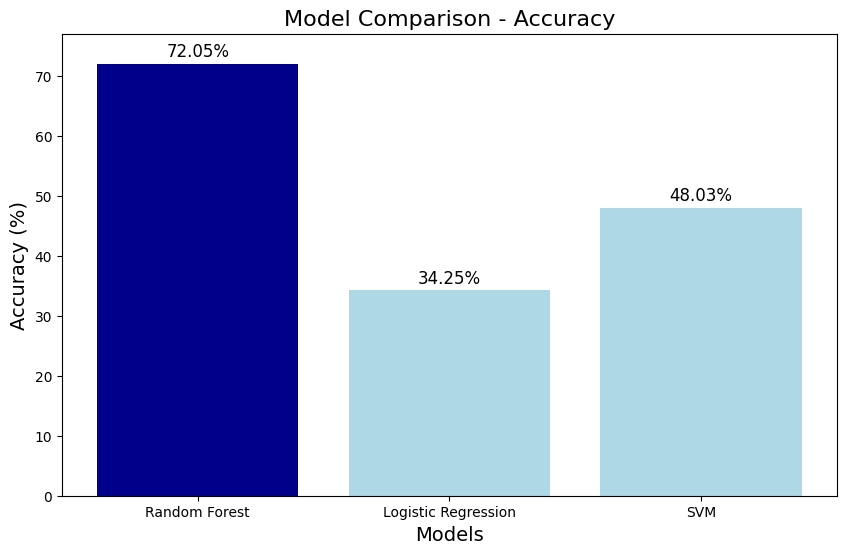

In [59]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure you import numpy

# Model names and accuracies (ensure that the accuracy values are correctly calculated)
models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [accuracy_rf, accuracy_log_reg, accuracy_svm]  # Check that these are defined and correct
best_model_index = np.argmax(accuracies)

# Set colors: dark blue for the best model, light blue for others
colors = ['lightblue'] * len(models)
colors[best_model_index] = 'darkblue'  # Highlight the best model

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)

# Adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Comparison - Accuracy', fontsize=16)

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

# Set the y-axis limits to cover your range of accuracies
plt.ylim(0, max(accuracies) + 5)  # Make sure there is some space above the highest bar for the text
plt.show()
